# Exploratory questions
    1. What categories recur and how often?
    2. Has that changed over time?
    3. How often do the same answers occur?
    4. What categories are they in?
    5. What defines a high-scoring game?
    6. Is there a correlation between categories and high-scoring games?
    7. Is there a correlation between winners and correct daily double answers?
    8. What categories have the fewest correct answers proportionally?
    9. Analyze all the above by round: J/DJ/FJ.
    10. How do scores change between DJ and FJ?
    11. Is it possible to explore wagering in this context/time frame?
    12. Can similar categories be grouped into families for exploration, analysis, visualization?
    13. Can answers that are "the same" but not "identical" be identified/grouped in some way?
    
# Plot types to explore
    1. Heatmap
    2. Circular packing
    3. Word cloud
    4. Lollipop
    5. Circular bar plot
    6. Correlogram
    
    

# Cleaning steps

    1. Remove all '$' and ',' from the following: clue_value, corr_FJ_wager1/2/3, incorr_FJ_wager1/2/3
    2. Add a clue_order of 61 to all FJ clues

# Insights

    1. For exploration of "high scoring game", consider tree map of scores divided into dollar buckets of 5K or 10K.
    2. Need a companion straightforward representation of the distribution of scores to go with 1 above.

In [1]:
import re
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
clues = pd.read_csv('../data/j_clues.csv')
clues.head()

,round_code,cat_num,clue_num,clue_id,clue_value,daily_double,clue_order,clue_text,corr_resp,corr_respr1,...,incorr_respr1,incorr_FJ_wager1,incorr_respr2,incorr_FJ_wager2,incorr_respr3,incorr_FJ_wager3,category,season,show_num,air_date
0,J,1,1,clue_J_1_1,$200,False,11.0,The Shenandoah Valley battlefields NHA preserv...,the American Civil War,Josiah,...,NaN,NaN,NaN,NaN,NaN,NaN,NATIONAL HERITAGE AREAS,37,8313,1/13/2021
1,J,2,1,clue_J_2_1,$200,False,1.0,"In his review of ""Legendary"", Roger Ebert call...",a tearjerker,Lucy,...,NaN,NaN,NaN,NaN,NaN,NaN,TYPES OF MOVIES,37,8313,1/13/2021
2,J,3,1,clue_J_3_1,$200,False,16.0,"A saltire is a diagonal cross, like on the fla...",Scotland,Josiah,...,NaN,NaN,NaN,NaN,NaN,NaN,FLAG TALK,37,8313,1/13/2021
3,J,4,1,clue_J_4_1,$200,False,25.0,Ronald Reuel were middle names for this Middle...,Tolkien,Cameron,...,NaN,NaN,NaN,NaN,NaN,NaN,2 MIDDLE NAMES,37,8313,1/13/2021
4,J,5,1,clue_J_5_1,$200,False,26.0,In the 1820s chemist Friedlieb Runge discovere...,caffeine,Cameron,...,NaN,NaN,NaN,NaN,NaN,NaN,SCIENTIFIC DISCOVERIES,37,8313,1/13/2021


In [3]:
clues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375242 entries, 0 to 375241
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   round_code        375242 non-null  object 
 1   cat_num           375242 non-null  int64  
 2   clue_num          375242 non-null  int64  
 3   clue_id           375242 non-null  object 
 4   clue_value        368949 non-null  object 
 5   daily_double      375242 non-null  bool   
 6   clue_order        368949 non-null  float64
 7   clue_text         375242 non-null  object 
 8   corr_resp         375239 non-null  object 
 9   corr_respr1       318263 non-null  object 
 10  corr_FJ_wager1    5024 non-null    object 
 11  corr_respr2       3038 non-null    object 
 12  corr_FJ_wager2    3038 non-null    object 
 13  corr_respr3       1188 non-null    object 
 14  corr_FJ_wager3    1188 non-null    object 
 15  triple_stumper    375242 non-null  bool   
 16  incorr_respr1     50

In [4]:
#clues[clues['round_code']=='FJ']['clue_order']=61
clues.loc[clues['round_code'] == 'FJ', 'clue_order'] = 61

In [139]:
#clues['clue_order'] = clues['clue_order'].astype(int)

In [5]:
clues[clues['round_code']=='FJ'][['corr_FJ_wager1', 'corr_FJ_wager2', 'corr_FJ_wager3', 'incorr_FJ_wager1', 'incorr_FJ_wager2', 'incorr_FJ_wager3']]

,corr_FJ_wager1,corr_FJ_wager2,corr_FJ_wager3,incorr_FJ_wager1,incorr_FJ_wager2,incorr_FJ_wager3
60,"$2,103",$8,NaN,$1,NaN,NaN
121,"$7,900",NaN,NaN,"$6,398","$3,599",NaN
182,"$3,601",$0,NaN,"$6,000",NaN,NaN
241,$0,"$11,601",NaN,NaN,NaN,NaN
302,"$9,000","$12,400",NaN,"$8,201",NaN,NaN
...,...,...,...,...,...,...
375002,NaN,NaN,NaN,"$5,399","$6,100","$1,701"
375063,NaN,NaN,NaN,"$5,899","$4,000",NaN
375122,$900,"$5,401","$2,000",NaN,NaN,NaN
375183,"$2,399","$4,700","$3,500",NaN,NaN,NaN


In [6]:
clues['clue_value']=[(re.sub('[$,]', '', val)) for val in clues['clue_value'].apply(str)]
clues['corr_FJ_wager1']=[(re.sub('[$,]', '', val)) for val in clues['corr_FJ_wager1'].apply(str)]
clues['corr_FJ_wager2']=[(re.sub('[$,]', '', val)) for val in clues['corr_FJ_wager2'].apply(str)]
clues['corr_FJ_wager3']=[(re.sub('[$,]', '', val)) for val in clues['corr_FJ_wager3'].apply(str)]
clues['incorr_FJ_wager1']=[(re.sub('[$,]', '', val)) for val in clues['incorr_FJ_wager1'].apply(str)]
clues['incorr_FJ_wager2']=[(re.sub('[$,]', '', val)) for val in clues['incorr_FJ_wager2'].apply(str)]
clues['incorr_FJ_wager3']=[(re.sub('[$,]', '', val)) for val in clues['incorr_FJ_wager3'].apply(str)]

In [7]:
clues.loc[clues['round_code'] == 'FJ', 'clue_value'] = 0

In [8]:
clues[clues['round_code']=='FJ']['clue_value']

60        0
121       0
182       0
241       0
302       0
         ..
375002    0
375063    0
375122    0
375183    0
375241    0
Name: clue_value, Length: 6293, dtype: object

In [53]:
#clues.to_csv('../data/j_clues_cleaned.csv', index=False, header=True)

In [9]:
categories = clues.groupby(['category','show_num']).count().reset_index()
categories = categories[['category','show_num']]

In [10]:
categories

,category,show_num
0,A JIM CARREY FILM FESTIVAL,4658
1,"""!""",3683
2,"""&""",8150
3,"""&"" MAGAZINES",6438
4,"""'YS"" WORDS",6734
...,...,...
81597,“A” IN SCIENCE,1193
81598,“G” WHIZ!,3195
81599,“HARD” & “EASY” MOVIES,3195
81600,“R” MOVIES,3049


In [11]:
categories.groupby(['category']).count().sort_values(['show_num'], ascending = False).head(50)

,show_num
category,
AMERICAN HISTORY,206
WORD ORIGINS,178
SCIENCE,174
LITERATURE,171
WORLD GEOGRAPHY,155
POTPOURRI,152
BEFORE & AFTER,151
HISTORY,141
COLLEGES & UNIVERSITIES,140


In [12]:
clues[clues['category'] =='BEFORE & AFTER'][['season', 'show_num', 'air_date','round_code', 'clue_text', 'corr_resp']]

,season,show_num,air_date,round_code,clue_text,corr_resp
35,37,8313,1/13/2021,DJ,"Ice cream with chocolate, marshmallows & nuts ...",a Rocky Road trip
41,37,8313,1/13/2021,DJ,Ordinal synonym for E.S.P. that's also a healt...,sixth sense of humor
47,37,8313,1/13/2021,DJ,Harry Potter novel involving Arizona's NBA squad,Order of the Phoenix Suns
53,37,8313,1/13/2021,DJ,"Folk trio behind ""Puff The Magic Dragon"" who w...","Peter, Paul & Mary Tyler Moore"
59,37,8313,1/13/2021,DJ,Office supply item made by Alliance that was a...,rubber band of Brothers
...,...,...,...,...,...,...
316072,14,2989,9/4/1997,J,Walt Whitman poem about Mr. Green Jeans' buddy,"""O Captain! My Captain Kangaroo"""
316078,14,2989,9/4/1997,J,Daily newspaper of the group founded by Mary B...,The Christian Science Monitor Lizard
316084,14,2989,9/4/1997,J,"""Atlas Shrugged"" atlas maker",Ayn Rand McNally
320932,13,2907,4/1/1997,J,Maid of Orleans with a monument at the end of ...,the Joan of Arc de Triomphe


In [16]:
answers = clues.groupby(['corr_resp']).count().reset_index()
answers = answers[['corr_resp', 'round_code']]

In [18]:
answers = answers.sort_values(['round_code'], ascending = False)#.head(50)

In [19]:
answers

,corr_resp,round_code
10693,=,456
13875,Australia,350
19659,Chicago,334
19792,China,333
34214,Japan,305
...,...,...
50972,Rothschild giraffe,1
50969,Roth\'s sloths,1
50968,Roth\'s moths,1
50967,Roth\'s broths,1


In [31]:
answers_1 = answers[answers['round_code']==1]
answers_gt1 = answers[answers['round_code']>1]

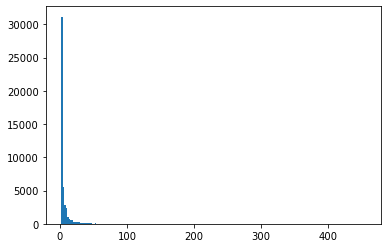

In [32]:
plt.hist(answers_gt1['round_code'], bins = 200);

In [33]:
answers_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75712 entries, 80555 to 122776
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   corr_resp   75712 non-null  object
 1   round_code  75712 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [34]:
answers_gt1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47065 entries, 10693 to 79530
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   corr_resp   47065 non-null  object
 1   round_code  47065 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [35]:
answers_gt1_count = answers_gt1['round_code'].sum()

In [36]:
answers_gt1_count

299527

In [37]:
299527 + 75712

375239

In [40]:
answers.describe()

,round_code
count,122777.000000
mean,3.056265
std,7.920729
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,456.000000


In [42]:
unique, frequency = np.unique(clues['corr_resp'].astype(str), return_counts = True)

In [43]:
unique

array([' 22 Jump Street',
       ' A Funny Thing Happened on the Way to the Forum', ' Hamlet ', ...,
       '“La Belle Dame Sans Merci”', '“Mending Wall”',
       '“one giant leap for mankind”'], dtype=object)

In [44]:
frequency

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
uniques = np.unique(clues['corr_resp'].astype(str), return_counts = True)

In [49]:
uniques = pd.DataFrame(frequency, unique, columns=(['count']))

In [50]:
uniques.sort_values(['count'], ascending = False)

,count
=,456
Australia,350
Chicago,334
China,333
Japan,305
...,...
Rothschild giraffe,1
Roth\'s sloths,1
Roth\'s moths,1
Roth\'s broths,1


In [39]:
clues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375242 entries, 0 to 375241
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   round_code        375242 non-null  object 
 1   cat_num           375242 non-null  int64  
 2   clue_num          375242 non-null  int64  
 3   clue_id           375242 non-null  object 
 4   clue_value        375242 non-null  object 
 5   daily_double      375242 non-null  bool   
 6   clue_order        375242 non-null  float64
 7   clue_text         375242 non-null  object 
 8   corr_resp         375239 non-null  object 
 9   corr_respr1       318263 non-null  object 
 10  corr_FJ_wager1    375242 non-null  object 
 11  corr_respr2       3038 non-null    object 
 12  corr_FJ_wager2    375242 non-null  object 
 13  corr_respr3       1188 non-null    object 
 14  corr_FJ_wager3    375242 non-null  object 
 15  triple_stumper    375242 non-null  bool   
 16  incorr_respr1     50

In [207]:
clues[clues['corr_resp']=='Chicago'][['season','show_num','air_date','round_code', 'clue_text','corr_resp','triple_stumper']]

,season,show_num,air_date,round_code,clue_text,corr_resp,triple_stumper
1061,37,8296,2020-12-07,DJ,"Grant Wood's ""American Gothic"" resides at the ...",Chicago,False
1629,37,8286,2020-11-23,J,Before overwhelming us with a bunch of shows...,Chicago,False
1773,37,8284,2020-11-19,DJ,One of the oldest repositories of African-Amer...,Chicago,False
3986,37,8246,2020-09-28,J,Cicero & Oak Park are western suburbs of this ...,Chicago,False
5218,36,8225,2020-05-29,J,"In 2019, Christie Brinkley starred on Broadway...",Chicago,False
...,...,...,...,...,...,...,...
325673,13,2826,1996-12-09,DJ,In 1898 DePaul University was founded in this ...,Chicago,False
327134,13,2800,1996-11-01,J,The American Medical Association is headquarte...,Chicago,False
327480,13,2786,1996-10-14,J,"On April 16, 1996, this city's Bulls became th...",Chicago,False
329480,12,2739,1996-06-27,DJ,Over 50% of Illinois' population lives in the ...,Chicago,False


In [208]:
clues[clues['clue_text'].str.contains('Chicago')]

,round_code,cat_num,clue_num,clue_id,clue_value,daily_double,clue_order,clue_text,corr_resp,corr_respr1,...,incorr_respr1,incorr_FJ_wager1,incorr_respr2,incorr_FJ_wager2,incorr_respr3,incorr_FJ_wager3,category,season,show_num,air_date
48,DJ,1,4,clue_DJ_1_4,4000,True,29,"Though he didn't win for ""Chicago"" in 1976, th...",Bob Fosse,Lucy,...,NaN,nan,NaN,nan,NaN,nan,CHOREOGRAPHERS,37,8313,2021-01-13
589,DJ,4,5,clue_DJ_4_5,2000,False,3,A fight between strikers & strikebreakers on M...,the Haymarket Riot,Brayden,...,NaN,nan,NaN,nan,NaN,nan,1800s AMERICA,37,8304,2020-12-17
1169,DJ,2,2,clue_DJ_2_2,800,False,1,"""All That Jazz"" in ""Chicago""",Catherine Zeta-Jones,Fred,...,NaN,nan,NaN,nan,NaN,nan,SINGING FOR YOUR OSCAR,37,8294,2020-12-03
1443,J,1,2,clue_J_1_2,400,False,2,This documentary series follows the Chicago Bu...,The Last Dance,NaN,...,NaN,nan,NaN,nan,NaN,nan,TV SPORTS MIX,37,8289,2020-11-26
1515,J,6,3,clue_J_6_3,600,False,23,On its way from Chicago to the Pacific Northwe...,Lewis & Clark,Ryan,...,NaN,nan,NaN,nan,NaN,nan,WHERE'S THIS TRAIN HEADED?,37,8288,2020-11-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329444,DJ,3,5,clue_DJ_3_5,1000,False,5,"A May 3, 1886 clash at the McCormick Reaper Wo...",Haymarket Riot,Paul,...,NaN,nan,NaN,nan,NaN,nan,AMERICAN HISTORY,12,2742,1996-07-02
329957,J,1,5,clue_J_1_5,500,False,20,"A native of Chicago, she became the first blac...",Carol Moseley Braun,Rick,...,NaN,nan,NaN,nan,NaN,nan,BLACK AMERICA,12,2730,1996-06-14
331979,DJ,4,4,clue_DJ_4_4,800,False,29,In 1930 Grant Wood's reputation was establishe...,"""American Gothic""",David,...,NaN,nan,NaN,nan,NaN,nan,ART,12,2677,1996-04-02
332182,J,1,3,clue_J_1_3,300,False,23,"In 1916 he gave us his ""Chicago Poems""",Carl Sandburg,Al,...,NaN,nan,NaN,nan,NaN,nan,CHICAGO,12,2672,1996-03-26


In [54]:
scores = pd.read_csv('../data/j_scores02.csv')

In [55]:
scores.head(10)

,show_num,round_code,contestant,score,num_right,num_ddright,num_wrong,num_ddwrong,finish
0,8313,J,Lucy,6600,28,2,1,0,Winner
1,8313,J,Josiah,4200,15,0,1,0,Second
2,8313,J,Cameron,-900,7,0,5,1,Third
3,8313,DJ,Lucy,31400,28,2,1,0,Winner
4,8313,DJ,Josiah,9400,15,0,1,0,Second
5,8313,DJ,Cameron,2300,7,0,5,1,Third
6,8313,FJ,Lucy,31399,28,2,1,0,Winner
7,8313,FJ,Josiah,9408,15,0,1,0,Second
8,8313,FJ,Cameron,4403,7,0,5,1,Third
9,8312,J,Tanay,10000,18,1,2,0,Second


In [56]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50193 entries, 0 to 50192
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   show_num     50193 non-null  int64 
 1   round_code   50193 non-null  object
 2   contestant   50193 non-null  object
 3   score        50193 non-null  int64 
 4   num_right    50193 non-null  int64 
 5   num_ddright  50193 non-null  int64 
 6   num_wrong    50193 non-null  int64 
 7   num_ddwrong  50193 non-null  int64 
 8   finish       50193 non-null  object
dtypes: int64(6), object(3)
memory usage: 3.4+ MB


In [57]:
fj_scores = scores[(scores['round_code']=='FJ') & (scores['finish']=='Winner')]

In [58]:
fj_scores

,show_num,round_code,contestant,score,num_right,num_ddright,num_wrong,num_ddwrong,finish
6,8313,FJ,Lucy,31399,28,2,1,0,Winner
17,8312,FJ,Lucy,33100,22,2,2,0,Winner
25,8311,FJ,Tanay,26800,27,2,2,1,Winner
35,8310,FJ,Jim,24401,18,0,4,0,Winner
42,8309,FJ,Yoshie,24800,20,1,2,1,Winner
...,...,...,...,...,...,...,...,...,...
50156,2674,FJ,Judy,5900,19,1,4,0,Winner
50163,2673,FJ,Marty,14001,19,2,3,0,Winner
50172,2672,FJ,Marty,13001,20,0,2,0,Winner
50183,2670,FJ,Maria,7800,25,0,2,0,Winner


In [61]:
fj_scores['bucket'] = fj_scores['score'] - fj_scores['score']%10000
fj_scores

<ipython-input-61-9b5a7e501521>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fj_scores['bucket'] = fj_scores['score'] - fj_scores['score']%10000


,show_num,round_code,contestant,score,num_right,num_ddright,num_wrong,num_ddwrong,finish,bucket
6,8313,FJ,Lucy,31399,28,2,1,0,Winner,30000
17,8312,FJ,Lucy,33100,22,2,2,0,Winner,30000
25,8311,FJ,Tanay,26800,27,2,2,1,Winner,20000
35,8310,FJ,Jim,24401,18,0,4,0,Winner,20000
42,8309,FJ,Yoshie,24800,20,1,2,1,Winner,20000
...,...,...,...,...,...,...,...,...,...,...
50156,2674,FJ,Judy,5900,19,1,4,0,Winner,0
50163,2673,FJ,Marty,14001,19,2,3,0,Winner,10000
50172,2672,FJ,Marty,13001,20,0,2,0,Winner,10000
50183,2670,FJ,Maria,7800,25,0,2,0,Winner,0


In [62]:
fj_scores[['bucket', 'score']].groupby(['bucket']).count()

,score
bucket,
0,1060
10000,2181
20000,1739
30000,474
40000,67
50000,29
60000,5
70000,7
80000,6


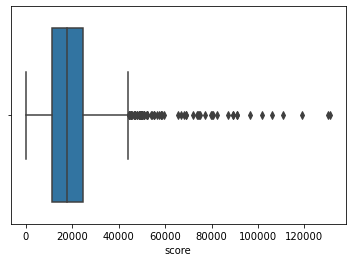

In [63]:
sns.boxplot(x = fj_scores['score']);

In [65]:
#np.quantile(fj_scores['score'], .75)
fj_scores['score'].describe()

count      5577.000000
mean      18562.790748
std       10294.410510
min           0.000000
25%       11201.000000
50%       17800.000000
75%       24399.000000
max      131127.000000
Name: score, dtype: float64

In [26]:
fj_scores.sort_values(['score'], ascending = False)

,show_num,round_code,contestant,score,num_right,num_ddright,num_wrong,num_ddwrong,finish
3048,7973,FJ,James,131127,40,2,0,0,Winner
2796,8001,FJ,James,130022,40,3,0,0,Winner
3012,7977,FJ,James,118816,41,3,1,0,Winner
3102,7967,FJ,James,110914,42,3,1,0,Winner
3057,7972,FJ,James,106181,42,3,2,0,Winner
...,...,...,...,...,...,...,...,...,...
9807,7216,FJ,Mike,0,17,0,0,0,Winner
45951,3190,FJ,Steve,0,25,1,4,0,Winner
49344,2808,FJ,Carl,0,15,1,3,1,Winner
15891,6539,FJ,Kelton,0,20,2,5,0,Winner


In [27]:
fj_scores[fj_scores['score']==0]

,show_num,round_code,contestant,score,num_right,num_ddright,num_wrong,num_ddwrong,finish
9807,7216,FJ,Mike,0,17,0,0,0,Winner
15891,6539,FJ,Kelton,0,20,2,5,0,Winner
45951,3190,FJ,Steve,0,25,1,4,0,Winner
46617,3116,FJ,Jane,0,21,0,2,0,Winner
49344,2808,FJ,Carl,0,15,1,3,1,Winner


In [28]:
fj_scores[fj_scores['score'] > 50000]

,show_num,round_code,contestant,score,num_right,num_ddright,num_wrong,num_ddwrong,finish
2373,8050,FJ,Jason,58400,38,3,1,0,Winner
2760,8005,FJ,James,79633,37,3,3,0,Winner
2769,8004,FJ,James,58612,32,3,1,0,Winner
2778,8003,FJ,James,69033,35,2,1,0,Winner
2787,8002,FJ,James,59381,34,1,0,0,Winner
2796,8001,FJ,James,130022,40,3,0,0,Winner
2805,8000,FJ,James,74400,37,1,2,0,Winner
2814,7999,FJ,James,52108,26,1,1,0,Winner
2823,7998,FJ,James,71885,35,2,1,0,Winner
2832,7997,FJ,James,86905,34,3,0,0,Winner


In [33]:
scores['score'].median()

5800.0

In [34]:
scores['score'].mean()

8135.930667622975

SERVER
output$county_dynamic <- renderUI({
    county_choices <- censusdata %>%
      filter(state == input$state) %>%
      distinct(county) %>%
      deframe()
    selectInput('County',
                'Select County:',
                choices = c('', county_choices),
                selected = NULL)
<br>
<br>
UI
uiOutput('county_dynamic')

